<a href="https://colab.research.google.com/github/KlemDoug/FAD-M4/blob/main/%5BM4%5D_Projeto_Extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funcionários da Companhia Milsa
---
- SENAC/RESILIA - Formação em Análise de Dados (FAD)            
- Projeto Extra - Módulo 4                 
- !/usr/bin/env python3 - versão = '3.11(64-bit)' 
- (-*- coding:utf-8-*-)                                        
- Criado por: Douglas Klem Portugal do Amaral                   
- Data de criação: 08/05/2023                                   
---

#Contexto
---
A companhia Milsa possui dados de 36 funcionários da seção de orçamentos. Para cada funcionário temos os seguintes atributos: estado civil, instrução de educação, filhos, salário, idade (anos e meses) e região. A imagem a seguir mostra o exemplo de dados de 5 destes funcionários:
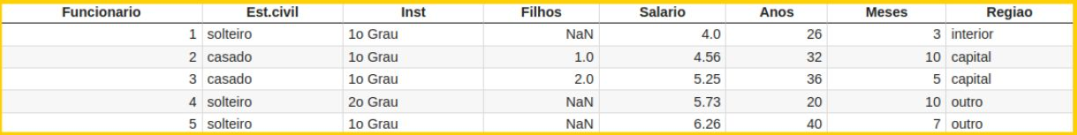
A empresa deseja saber algumas informações sobre esses dados e solicitou que você fizesse uma análise detalhada em um notebook, o qual precisa estar bem estruturado e com markdowns explicando cada insight encontrado.
Leia o dataset e realize uma análise sabendo das seguintes questões que precisam ser levadas em conta na seção posterior:

#Dados para o Relatório
---
Primeiramente, coloque a coluna **Funcionário** como índice; saiba que a coluna **Meses** não é necessária para a análise e deve ser retirada. Com isso em mente, temos as perguntas:

*Insights Iniciais*:

1. Qual a média de idade dos funcionários?
2. Dos funcionários com filhos, qual o número mais comum?
3. Qual a média e a mediana dos salários dos funcionários? O que esses valores podem indicar?
4. Quais são os tipos de instrução existentes?
5. Qual a média de salário e idade das pessoas casadas?
6. Qual o funcionário que possui maior salário (informe seus atributos)?
7. Qual o funcionário que possui menor idade (informe seus atributos)?
8. Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem instrução de 2o grau?

*Insights Estratégicos*:

1.  *insira a pergunta aqui*
2.  *insira a pergunta aqui* 
3.  *insira a pergunta aqui*

Faça uma correlação entre todos os atributos. (Mapeie os atributos
qualitativos para atributos quantitativos. Ex: solteiro: 1, casado: 2, etc).

#Limpeza dos Dados
---

In [ ]:
#realizando a importação das bibliotecas necessárias à execução do projeto (Pandas/NumPy/MatPlotLib)
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#leitura do banco de dados em .csv via url através da função .read 
url = 'http://www.leg.ufpr.br/~fernandomayer/data/milsa.csv'
milsa_database = pd.read_csv(url)
display(milsa_database)

In [ ]:
#criando uma copia do database para manipulação dos dados sem comprometer a fonte original via função .copy()
milsacopia=milsa_database.copy()
#criando um dicionário com os novos nomes para as colunas do database e aplicando a mudança via função .rename(columns=)
renomeie={'Funcionario': 'Funcionário', 'Est.civil': 'Estado Civil', 'Inst': 'Grau de Instrução',
          'Salario':'Salário (valor/hora)', 'Anos':'Idade (anos)', 'Regiao':'Região'}
milsacopia=milsacopia.rename(columns=renomeie)
#colocando a coluna 'Funcionário' como índice via função .set_index
milsacopia=milsacopia.set_index('Funcionário')
#removendo a coluna 'Meses' do database via função .drop
milsacopia = milsacopia.drop('Meses', axis=1)

#Análise Exploratória
---


In [ ]:
#visualização do database tratado
display(milsacopia)

,Estado Civil,Grau de Instrução,Filhos,Salário (valor/hora),Idade (anos),Região
Funcionário,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,interior
2,casado,1o Grau,1.0,4.56,32,capital
3,casado,1o Grau,2.0,5.25,36,capital
4,solteiro,2o Grau,NaN,5.73,20,outro
5,solteiro,1o Grau,NaN,6.26,40,outro
6,casado,1o Grau,0.0,6.66,28,interior
7,solteiro,1o Grau,NaN,6.86,41,interior
8,solteiro,1o Grau,NaN,7.39,43,capital
9,casado,2o Grau,1.0,7.59,34,capital


##*Insights* Iniciais
---

## [1] Média de idade dos funcionários

In [ ]:
#criando a variável para salvar a média calculada via função .mean() pela coluna 'Anos'
imedia=milsacopia['Idade (anos)'].mean().round(0)
print('*'*90)
print(f"A média de idade dos funcionários cadastrados na seção de orçamentos é de {int(imedia)} anos.")
print('*'*90)

******************************************************************************************
A média de idade dos funcionários cadastrados na seção de orçamentos é de 35 anos.
******************************************************************************************


## [2] Número mais comum dentre os funcionários com filhos

In [ ]:
#criando a variável para salvar a moda calculada via função .mode() pela coluna 'Filhos'
modafilhos=milsacopia['Filhos'].mode()
print('*'*90)
print(f"Dentre os funcionários cadastrados que possuem filhos, o número mais comum é de {int(modafilhos)} filhos.")
print('*'*90)

******************************************************************************************
Dentre os funcionários cadastrados que possuem filhos, o número mais comum é de 2 filhos.
******************************************************************************************


## [3] Média e mediana dos salários dos funcionários: o que esses valores indicam

In [ ]:
#criando a variável para salvar a média calculada via função .mean() pela coluna 'Salario'
smedia=milsacopia['Salário (valor/hora)'].mean().round(2)
#criando a variável para salvar a mediana calculada via função .median() pela coluna 'Salario'
smediana=milsacopia['Salário (valor/hora)'].median().round(2)
print('*'*90)
print(f"A média e mediana dos salários dos funcionários são, respectivamente, {smedia} e {smediana}.")
print('*'*90)

******************************************************************************************
A média e mediana dos salários dos funcionários são, respectivamente, 11.12 e 10.16.
******************************************************************************************


>Estatisticamente falando: quando temos valores absolutos não muito próximos de média e mediana numa amostra de dados, é um dos possíveis indícios de ASSIMETRIA na distribuição desses dados.

>A assimetria normalmente acontece quando temos dados com valores mínimos ou máximos ('*outliers*') muito destoantes no restante da amostra.

>Indicativos assim servem para revermos a importância e/ou a necessidade de tratamento desses *outliers* na nossa amostra.




## [4] Tipos de instrução existentes

In [ ]:
#criando a variável para salvar o retorno apenas dos valores únicos da coluna 'Inst' via função .drop_duplicates()
instrype=milsacopia['Grau de Instrução'].drop_duplicates()
print(instrype) #visualização dos dados impressos para ter os índices adequados à resposta formatada abaixo
print('*'*105)
print(f"O quadro de funcionários analisado possui os seguintes níveis de instrução: {instrype[1]}, {instrype[4]} e {instrype[19]}.")
print('*'*105)

Funcionário
1      1o Grau
4      2o Grau
19    Superior
Name: Grau de Instrução, dtype: object
*********************************************************************************************************
O quadro de funcionários analisado possui os seguintes níveis de instrução: 1o Grau, 2o Grau e Superior.
*********************************************************************************************************


## [5] Média de salário e idade das pessoas casadas

In [ ]:
#criando a variável para armazenar a média (.mean()) apenas dos valores de salário alinhados com o dado 'casado' via função .loc()
smarriedmedia=milsacopia.loc[milsacopia['Estado Civil']=='casado','Salário (valor/hora)'].mean().round(2)
##criando a variável para armazenar a média (.mean()) apenas dos valores de idade alinhados com o dado 'casado' via função .loc()
imarriedmedia=milsacopia.loc[milsacopia['Estado Civil']=='casado','Idade (anos)'].mean().round(2)
print('*'*90)
print(f"As médias de salário e idade dos funcionários casados são, respectivamente: {smarriedmedia} e {imarriedmedia}.")
print('*'*90)

******************************************************************************************
As médias de salário e idade dos funcionários casados são, respectivamente: 12.12 e 35.15.
******************************************************************************************


## [6] Funcionário com maior salário e seus atributos

In [ ]:
#criando a variável para armazenar a localização do maior salário via função .max()
bigboss=milsacopia['Salário (valor/hora)'].max()
##criando a variável que armazena o filtro via função .loc() e utiliza a variável anterior para direcionar à linha que queremos
dadosbigboss = milsacopia.loc[milsacopia['Salário (valor/hora)'] == bigboss]
display(dadosbigboss)

,Estado Civil,Grau de Instrução,Filhos,Salário (valor/hora),Idade (anos),Região
Funcionário,,,,,,
36,casado,Superior,3.0,23.3,42,interior


## [7]  Funcionário com menor idade e seus atributos

In [ ]:
#criando a variável para armazenar a localização da menor idade via função .min()
babyboss=milsacopia['Idade (anos)'].min()
##criando a variável que armazena o filtro via função .loc() e utiliza a variável anterior para direcionar à linha que queremos
dadosbabyboss = milsacopia.loc[milsacopia['Idade (anos)'] == babyboss]
display(dadosbabyboss)

,Estado Civil,Grau de Instrução,Filhos,Salário (valor/hora),Idade (anos),Região
Funcionário,,,,,,
4,solteiro,2o Grau,NaN,5.73,20,outro


## [8] Funcionários que possuem no máximo 35 anos, são da capital e tem instrução de segundo grau

In [ ]:
#criando variável que armazena filtros múltiplos via função .loc() e caracter '&'
condicoes=milsacopia.loc[(milsacopia['Idade (anos)']<=35) & (milsacopia['Região']=='capital') &
                         (milsacopia['Grau de Instrução']=='2o Grau'), ['Idade (anos)', 'Região', 'Grau de Instrução']]
display(condicoes)

,Idade (anos),Região,Grau de Instrução
Funcionário,,,
9,34,capital,2o Grau
17,31,capital,2o Grau
22,34,capital,2o Grau
30,35,capital,2o Grau


##*Insights* Estratégicos
---

## [9]

## [10]

## [11]

#Correlações
---

In [ ]:
#criando uma cópia do database utilizado para os insights somente para análise das correlações
milsacopia2=milsacopia.copy()
milsacopia2

##Mapeamento dos Atributos Qualitativos

In [142]:
#criando variável que armazena o mapeamento do atributo 'Estado Civil' para valores quantitativos
map_estcivil={'solteiro': 1, 'casado': 2}
milsacopia2['Estado Civil'] = milsacopia2['Estado Civil'].map(map_estcivil)

In [143]:
#criando variável que armazena o mapeamento do atributo 'Grau de Instrução' para valores quantitativos
map_instr={'1o Grau': 1, '2o Grau': 2, 'Superior': 3}
milsacopia2['Grau de Instrução'] = milsacopia2['Grau de Instrução'].map(map_instr)

In [144]:
#criando variável que armazena o mapeamento do atributo 'Região' para valores quantitativos
map_reg={'capital': 1, 'interior': 2, 'outro': 3}
milsacopia2['Região'] = milsacopia2['Região'].map(map_reg)

In [145]:
#criando variável que armazena a matriz de correlação entre todos os atributos do database
corrmilsa = milsacopia2.corr()
display(corrmilsa)

,Estado Civil,Grau de Instrução,Filhos,Salário (valor/hora),Idade (anos),Região
Estado Civil,1.000000,0.108465,NaN,0.247488,0.095369,-0.213498
Grau de Instrução,0.108465,1.000000,0.084215,0.639350,-0.216011,-0.033082
Filhos,NaN,0.084215,1.000000,0.358065,0.746539,-0.036868
Salário (valor/hora),0.247488,0.639350,0.358065,1.000000,0.363362,-0.093966
Idade (anos),0.095369,-0.216011,0.746539,0.363362,1.000000,-0.077851
Região,-0.213498,-0.033082,-0.036868,-0.093966,-0.077851,1.000000


##Visualização Gráfica

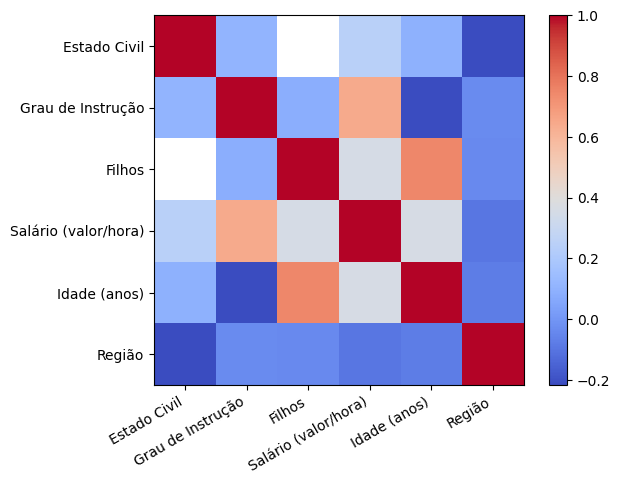

In [156]:
#criando o gráfico de calor a partir da matriz de correlação anterior 'corrmilsa'
fig, ax = plt.subplots()
heatmap = ax.imshow(corrmilsa, cmap='coolwarm')
#ajustando os eixos
ax.set_xticks(np.arange(corrmilsa.shape[1]))
ax.set_yticks(np.arange(corrmilsa.shape[0]))
ax.set_xticklabels(corrmilsa.columns)
ax.set_yticklabels(corrmilsa.columns)
plt.xticks(rotation=30, ha='right')
#adicionando barra de cores
cbar = plt.colorbar(heatmap)
#visualizando o gráfico
plt.show()


Observando o *dataframe* da matriz de correlação e seu respectivo mapa de calor, vemos que existem valores absolutos com correlação forte e positiva. Estes podem apontar para alguns entendimentos em cima dos dados que temos:

*   Os salários dos funcionários acompanham proporcionalmente o grau de instrução que possuem;
*   Existe uma tendência dos funcionários com mais idade terem mais filhos.

As correlações de caráter extremamente oposto (fracas e negativas) também dão apontamentos interessantes que complementam as conclusões acima:

*   O grau de instrução de cada funcionário não é impactado diretamente por sua idade;
*   O estado civil dos funcionários independe da região onde estão alocados.




#Considerações Finais
---

Partindo dessas informações iniciais, é possível fazer uma devolutiva eficaz à Milsa, abordando dados mais profundos como por exemplo:

1.   O quadro de funcionários desse setor ser qualificado e possuir salários atrativos de acordo com o cargo exercido;
2.   Aderência da empresa à assistências de licença paternidade/maternidade, creche e relacionados;  
3.   Planejamento de programas de capacitação e crescimento interno para funcionários menos instruídos ou, sazonalmente, programas internos para rotação de cargos.



---